<a href="https://colab.research.google.com/github/Ad0420/Sentiment-Analysis/blob/main/ML_in_Finance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf
NAS = yf.Ticker("AAPL")

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense , Dropout
from keras.optimizers import Adam

In [ ]:
NAS_HIS = NAS.history(period = "max")
NAS_HIS

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.099584,0.100017,0.099584,0.099584,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.094821,0.094821,0.094388,0.094388,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.087893,0.087893,0.087461,0.087461,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.089625,0.090058,0.089625,0.089625,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.092224,0.092657,0.092224,0.092224,73449600,0.0,0.0
...,...,...,...,...,...,...,...
2023-07-10 00:00:00-04:00,189.259995,189.990005,187.039993,188.610001,59922200,0.0,0.0
2023-07-11 00:00:00-04:00,189.160004,189.300003,186.600006,188.080002,46638100,0.0,0.0
2023-07-12 00:00:00-04:00,189.679993,191.699997,188.470001,189.770004,60750200,0.0,0.0


<Axes: xlabel='Date'>

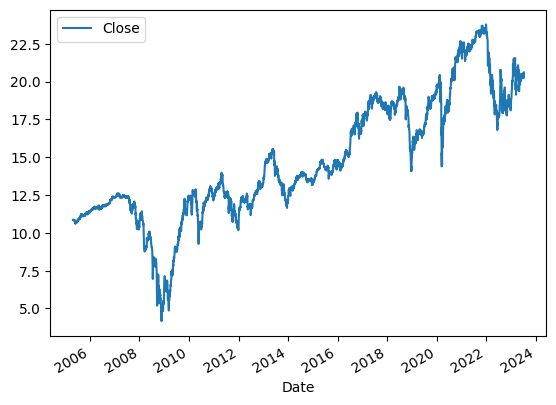

In [ ]:
NAS_HIS.plot.line(y= "Close")

In [ ]:
del NAS_HIS["Dividends"]
del NAS_HIS["Stock Splits"]

In [ ]:
NASDAQ = NAS_HIS
NASDAQ

,Open,High,Low,Close,Volume
Date,,,,,
2005-04-25 00:00:00-04:00,10.824407,10.850448,10.824407,10.841767,58200
2005-04-26 00:00:00-04:00,10.841767,10.937252,10.828747,10.837427,146000
2005-04-27 00:00:00-04:00,10.833079,10.846100,10.807038,10.846100,182700
2005-04-28 00:00:00-04:00,10.833084,10.850445,10.824404,10.850445,151500
2005-04-29 00:00:00-04:00,10.850448,10.850448,10.820067,10.841767,89400
...,...,...,...,...,...
2023-07-10 00:00:00-04:00,20.219999,20.409901,20.219999,20.347300,22928
2023-07-11 00:00:00-04:00,20.440001,20.500000,20.230000,20.500000,37795
2023-07-12 00:00:00-04:00,20.549999,20.700001,20.500000,20.620001,19396


In [ ]:
NASDAQ["Tomorrow"] = NASDAQ["Close"].shift(-1)

In [ ]:
NASDAQ

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
2005-04-25 00:00:00-04:00,10.824407,10.850448,10.824407,10.841767,58200,10.837427
2005-04-26 00:00:00-04:00,10.841767,10.937252,10.828747,10.837427,146000,10.846100
2005-04-27 00:00:00-04:00,10.833079,10.846100,10.807038,10.846100,182700,10.850445
2005-04-28 00:00:00-04:00,10.833084,10.850445,10.824404,10.850445,151500,10.841767
2005-04-29 00:00:00-04:00,10.850448,10.850448,10.820067,10.841767,89400,10.841767
...,...,...,...,...,...,...
2023-07-10 00:00:00-04:00,20.219999,20.409901,20.219999,20.347300,22928,20.500000
2023-07-11 00:00:00-04:00,20.440001,20.500000,20.230000,20.500000,37795,20.620001
2023-07-12 00:00:00-04:00,20.549999,20.700001,20.500000,20.620001,19396,20.600000


In [ ]:
NASDAQ["Prediction"] = (NASDAQ["Tomorrow"] > NASDAQ["Close"]).astype(int)

In [ ]:
NASDAQ = NASDAQ.loc["2006-01-01":].copy()

In [ ]:
NASDAQ

,Open,High,Low,Close,Volume,Tomorrow,Prediction
Date,,,,,,,
2006-01-03 00:00:00-05:00,11.350783,11.457363,11.350783,11.457363,20500,11.479568,1
2006-01-04 00:00:00-05:00,11.426277,11.501771,11.372988,11.479568,17600,11.466242,0
2006-01-05 00:00:00-05:00,11.501769,11.501769,11.412952,11.466242,36300,11.390748,0
2006-01-06 00:00:00-05:00,11.457360,11.457360,11.359662,11.390748,65900,11.492894,1
2006-01-09 00:00:00-05:00,11.390755,11.501776,11.390755,11.492894,15400,11.479568,0
...,...,...,...,...,...,...,...
2023-07-10 00:00:00-04:00,20.219999,20.409901,20.219999,20.347300,22928,20.500000,1
2023-07-11 00:00:00-04:00,20.440001,20.500000,20.230000,20.500000,37795,20.620001,1
2023-07-12 00:00:00-04:00,20.549999,20.700001,20.500000,20.620001,19396,20.600000,0


In [ ]:
predictors = ["Close", "Volume", "Open", "High", "Low"]
target = "Prediction"

In [ ]:
train = NASDAQ.iloc[:-100]
test = NASDAQ.iloc[-100:]

In [ ]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train[predictors])
test_scaled = scaler.transform(test[predictors])


In [ ]:
train_reshaped = train_scaled.reshape(train_scaled.shape[0], 1, train_scaled.shape[1])
test_reshaped = test_scaled.reshape(test_scaled.shape[0], 1, test_scaled.shape[1])

In [ ]:
from keras.regularizers import l2
from keras.layers import Dropout

# Create and train the modified LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Fit the model with a higher number of epochs
model.fit(train_reshaped, train["Prediction"], epochs=50, batch_size=32)

Epoch 1/50
135/135 [==============================] - 6s 6ms/step - loss: 0.4434
Epoch 2/50
135/135 [==============================] - 1s 6ms/step - loss: 0.3033
Epoch 3/50
135/135 [==============================] - 1s 6ms/step - loss: 0.2584
Epoch 4/50
135/135 [==============================] - 1s 6ms/step - loss: 0.2543
Epoch 5/50
135/135 [==============================] - 1s 6ms/step - loss: 0.2525
Epoch 6/50
135/135 [==============================] - 1s 6ms/step - loss: 0.2515
Epoch 7/50
135/135 [==============================] - 1s 6ms/step - loss: 0.2511
Epoch 8/50
135/135 [==============================] - 1s 6ms/step - loss: 0.2504
Epoch 9/50
135/135 [==============================] - 1s 6ms/step - loss: 0.2502
Epoch 10/50
135/135 [==============================] - 1s 6ms/step - loss: 0.2501
Epoch 11/50
135/135 [==============================] - 1s 10ms/step - loss: 0.2501
Epoch 12/50
135/135 [==============================] - 1s 10ms/step - loss: 0.2498
Epoch 13/50
135/135 [==

In [ ]:
test_preds = model.predict(test_reshaped).flatten()
test_preds = np.round(test_preds).astype(int)
precision = precision_score(test["Prediction"], test_preds)
print("Precision Score:", precision)
acc = accuracy_score(test["Prediction"], test_preds)
print("acc Score:", acc)

4/4 [==============================] - 1s 4ms/step
Precision Score: 0.47
acc Score: 0.47


RANDOM FORREST VERSION BELOW

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=1000, max_depth=200, min_samples_split=50,
                                       min_samples_leaf=5, max_features='auto', random_state=34)

In [ ]:
rf_classifier.fit(train[predictors], train["Prediction"])

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=200, max_features='auto', min_samples_leaf=5,
                       min_samples_split=50, n_estimators=1000,
                       random_state=34)

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score

In [ ]:
preds = rf_classifier.predict(test[predictors])

In [ ]:
preds = pd.Series(preds, index = test.index)
precision_score(test["Prediction"], preds)

0.45714285714285713

In [ ]:
accuracy_score(test["Prediction"], preds)

0.5